In [3]:
###### import numpy as np
import matplotlib.pyplot as plt
import SKIF_lib as skf
import numpy as np
import os

station = '1_1'

SKIF_path = skf.get_SKIF_directory() #get SKIF project root directory
TablesPath = skf.path_in_project('/' + station + '/TechReports/tabl/')#, your_sys='Mac OC')
FigPath = skf.path_in_project('/' + station + '/TechReports/pic/')
wfrPath = skf.path_in_project('/' + station + '/fields_' + station + '/')
Diamond_T_path = skf.path_in_project('/' + station + '/crystals_data_' + station + '/diamond_T/')
Diamond_R_path = skf.path_in_project('/' + station + '/crystals_data_' + station + '/diamond_R/')

def open_cry(file):

    f = open(file,"r+")
    lines=f.readlines()
    Y=[]

    for x in lines:
        Y.append(x.split('\t')[0])
    f.close()

    Y_ = [0]*(len(Y)-1)
    for i in range(len(Y)-1):
        Y_[i]=float(Y[i])
    return Y_

file_path_x = SKIF_path + Diamond_R_path + "x/"
file_path_y = SKIF_path + Diamond_R_path + "y/"
X_ =[]
Y_ =[]
files = os.listdir(file_path_x)
files.sort()

for filename in files:
    x_ = open_cry(file_path_x + filename)
    X_.append(np.array(x_))
    print(filename)

files = os.listdir(file_path_y)
files.sort()
for filename in files:
    y_ = open_cry(file_path_y + filename)
    Y_.append(np.array(y_))
    print(filename)
         
#saving Dravin curve into a file
harm1 = 11
harm2 = 13
harm3 = 17
harm4 = 23
harm = [harm1, harm2, harm3, harm4]
#Y_ = #[np.array(Y_14_4), np.array(Y_17_0), np.array(Y_22_35), np.array(Y_30_24)]
#X_ = #[np.array(X_14_4), np.array(X_17_0), np.array(X_22_35), np.array(X_30_24)]
HARM=[]
fwhm=[]
for (X, Y) in zip(X_, Y_):
    idx = np.where(Y > 0.5)
    fwhm.append(np.max(X[idx]) - np.min(X[idx]))
  
print(fwhm)
for (w, n) in zip(fwhm, harm): 
    HARM.append([int(n), w])

np.savetxt(SKIF_path + TablesPath + "Darvin_curve_diamond.csv", 
           HARM, fmt='%10.d,%10.3f', delimiter=',')#, delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')


Your project name is /home/andrei/Documents/SKIF_XAS_beamline
 edit the skf.get_SKIF_directory if it is needed
diamond_x_14_4.txt
diamond_x_17_0.txt
diamond_x_30_24.txt
diamond_y_14_4.txt
diamond_y_17_0.txt
diamond_y_30_24.txt
[13.230002, 11.0249994, 6.0750005]


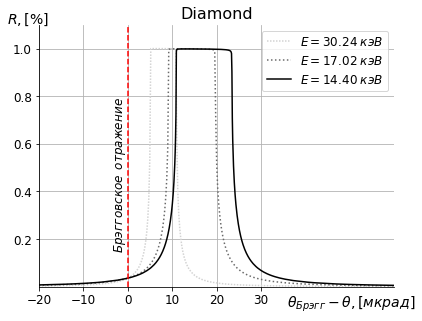

In [8]:
fig = plt.figure(figsize=(1.5*4,1.5*3))

X_14_4 = X_[0]
Y_14_4 = Y_[0]
X_17_0 = X_[1]
Y_17_0 = Y_[1]
X_30_24 = X_[2]
Y_30_24 = Y_[2]

plt.plot(X_30_24, Y_30_24, color='lightgray', label='$E = 30.24 \; кэВ$', linestyle=(0, (1, 1)))
plt.plot(X_17_0, Y_17_0, color='dimgray', label='$E = 17.02 \; кэВ$', linestyle=':')
plt.plot(X_14_4, Y_14_4, color='black', label='$E = 14.40 \; кэВ$')

plt.grid()

plt.xlabel(r'$\theta_{Брэгг} - \theta, [мкрад]$', fontsize=14, labelpad = 0.0)
y = plt.ylabel(r'$R, [\%]$', fontsize=14, labelpad = 0.0, rotation=90)
y.set_rotation(0)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_position(('axes',0))
ax.yaxis.set_ticks_position('left')
ax.spines['top'].set_position(('data',0))
ax.xaxis.set_label_coords(0.88, -0.03)
ax.yaxis.set_label_coords(-0.03, 0.99)

plt.xticks([-20, -10, 0, 10, 20,30],fontsize=12)
        #  [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([0.2,0.4,0.6,0.8, 1.0], fontsize=12)
        #  [r'$-1$', r'$0$', r'$+1$'])

plt.xlim(-20, 60)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.title("Diamond", fontsize=16)

plt.axvline(x=0, color='red', linestyle='--')

a=plt.text(-3.5, 0.75, r'$Брэгговское \enspace отражение$', fontsize=12)
a.set_rotation(90)

leg = plt.legend(fontsize=12)#loc='upper left')
# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

plt.savefig(SKIF_path + FigPath + 'Diamond_bragg_R.pdf')#, bbox_inches='tight')
plt.savefig(SKIF_path + FigPath + 'Diamond_bragg_R.png', dpi=200)#, bbox_inches='tight')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt


file = '/home/andrei/Documents/SKIF_XAS_beamline/crystals_data/diamond_T/diamond_T_x.txt'

f = open(file,"r+")
lines=f.readlines()
X=[]

for x in lines:
    X.append(x.split('\t')[0])
f.close()

file = '/home/andrei/Documents/SKIF_XAS_beamline/crystals_data/diamond_T/diamond_T_y.txt'

f = open(file,"r+")
lines=f.readlines()
Y=[]

for x in lines:
    Y.append(x.split('\t')[0])
f.close()


X_ = [0]*(len(X)-1)
Y_ = [0]*(len(X)-1)
for i in range(len(X)-1):
    X_[i]=float(X[i])*1e-3
    Y_[i]=float(Y[i])
    
plt.figure(figsize=(1.5*4,1.5*3))
plt.plot(X_, Y_, color='blue')
plt.xlabel(r'$E, [кэВ]$', fontsize=14, labelpad = 0.0)
y = plt.ylabel(r'$T, [\%]$', fontsize=14, labelpad = 0.0, rotation=90)
y.set_rotation(0)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_position(('axes',0))
ax.yaxis.set_ticks_position('left')
ax.spines['top'].set_position(('data',0))
ax.xaxis.set_label_coords(0.97, -0.03)
ax.yaxis.set_label_coords(-0.03, 0.99)

plt.xticks([0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5],fontsize=16)
        #  [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8,0.9,1.0], fontsize=16)
        #  [r'$-1$', r'$0$', r'$+1$'])
plt.grid()
plt.ylim(0, 1.1)
plt.xlim(0, 21.5)

plt.axvline(x=14.5, ymin=0, ymax=1/1.1 * 0.97381, color='red', linestyle='--')
plt.axhline(y=0.97381, xmin=0, xmax=1/20 * 13, color='red', linestyle='--')

x_pos = 13.500
y_pos = 0.7
a = plt.text(x_pos, y_pos, r'$11-ая \enspace гамоника$', fontsize=16)
a.set_rotation(90)

x_pos = 4.000
y_pos = 1.0
b = plt.text(x_pos, y_pos, r'$T = 0.974\% \; на \; 100 \; мкр$', fontsize=16)
b.set_rotation(0)

plt.savefig('/home/andrei/Documents/SKIF_XAS_beamline/TeXDoc/pic/bragg_T.pdf')#, bbox_inches='tight')
plt.savefig('/home/andrei/Documents/9_term/diplom/beamlines/1_1/bragg_T.png', dpi=200)
plt.show()
#0.97381


FileNotFoundError: [Errno 2] No such file or directory: '/home/andrei/Documents/SKIF_XAS_beamline/crystals_data/diamond_T/diamond_T_x.txt'

In [5]:
import numpy as np
import matplotlib.pyplot as plt


file = '/home/andrei/Documents/SKIF_XAS_beamline/crystals_data/diamond_T/diamond_T_x.txt'

f = open(file,"r+")
lines=f.readlines()
X=[]

for x in lines:
    X.append(x.split('\t')[0])
f.close()

file = '/home/andrei/Documents/SKIF_XAS_beamline/crystals_data/diamond_T/diamond_T_y.txt'

f = open(file,"r+")
lines=f.readlines()
Y=[]

for x in lines:
    Y.append(x.split('\t')[0])
f.close()


X_ = [0]*(len(X)-1)
Y_ = [0]*(len(X)-1)
for i in range(len(X)-1):
    X_[i]=float(X[i])
    Y_[i]=float(Y[i])
    
(np.max(X_)-np.min(X_))/len(X_)

39.72055888223553

In [10]:
import matplotlib.pyplot as plt
import SKIF_lib as skf
import numpy as np
import os
station = '1_1'

SKIF_path = skf.get_SKIF_directory() #get SKIF project root directory
TablesPath = skf.path_in_project('/' + station + '/TechReports/tabl/')#, your_sys='Mac OC')
FigPath = skf.path_in_project('/' + station + '/TechReports/pic/')
wfrPath = skf.path_in_project('/' + station + '/fields_' + station + '/')
Diamond_T_path = skf.path_in_project('/' + station + '/crystals_data_' + station + '/diamond_T/')
Diamond_R_path = skf.path_in_project('/' + station + '/crystals_data_' + station + '/diamond_R/')

file_path = SKIF_path + Diamond_T_path

def read_crystal_trans(file_path=None, file_name=None):
    
    if file_path is None:
        file_path = '/home/andrei/Documents/SKIF_XAS_beamline/1_2/crystals_data_1_2/diamond_T/'

    f = open(file_path+file_name,"r")
    lines=f.readlines()
    X=[]
    Y=[]
    for x in lines:
        X.append(float(x.split('\t')[0]))
        Y.append(float(x.split('\t')[1]))
    f.close()
    
    return(np.array(X), np.array(Y))

X_100, Y_100 = read_crystal_trans(file_path=file_path, file_name='diamond_T_100.txt')
X_480, Y_480 = read_crystal_trans(file_path=file_path, file_name='diamond_T_480.txt')
X_568, Y_568 = read_crystal_trans(file_path=file_path, file_name='diamond_T_568.txt')
X_742, Y_742 = read_crystal_trans(file_path=file_path, file_name='diamond_T_742.txt')
X_1004, Y_1004 = read_crystal_trans(file_path=file_path, file_name='diamond_T_1004.txt')

print(np.shape(X_100),np.shape(Y_100))

Your project name is /home/andrei/Documents/SKIF_XAS_beamline
 edit the skf.get_SKIF_directory if it is needed
(60000,) (60000,)


/home/andrei/Documents/SKIF_XAS_beamline/1_1/TechReports/pic/bragg_T.pdf


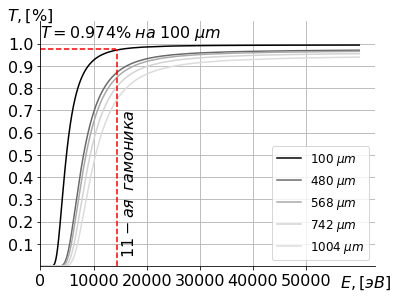

In [12]:
plt.figure(figsize=(1.5*4,1.5*3))
plt.plot(X_100, Y_100, color='black',label='$100 \; \mu m$')
plt.plot(X_480, Y_480, color='dimgray',label='$480 \; \mu m$')
plt.plot(X_568, Y_568, color='darkgray',label='$568 \; \mu m$')
plt.plot(X_742, Y_742, color='lightgray',label='$742 \; \mu m$')
plt.plot(X_1004, Y_1004, color='gainsboro',label='$1004 \; \mu m$')

plt.xlabel(r'$E, [эВ]$', fontsize=16, labelpad = 0.0)
y = plt.ylabel(r'$T, [\%]$', fontsize=16, labelpad = 0.0, rotation=90)
y.set_rotation(0)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['top'].set_position(('axes',0))
ax.yaxis.set_ticks_position('left')
ax.spines['top'].set_position(('data',0))
ax.xaxis.set_label_coords(0.97, -0.03)
ax.yaxis.set_label_coords(-0.03, 0.99)


plt.xticks([0, 10000, 20000, 30000, 40000, 50000],fontsize=16)
        #  [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8,0.9,1.0], fontsize=16)
        #  [r'$-1$', r'$0$', r'$+1$'])

plt.axvline(x=14500, ymin=0, ymax=1/1.1 * 0.97381, color='red', linestyle='--')
plt.axhline(y=0.97381, xmin=0, xmax=1/60000 * 13500, color='red', linestyle='--')

x_pos = 15200
y_pos = 0.65
a = plt.text(x_pos, y_pos, r'$11-ая \enspace гамоника$', fontsize=16)
a.set_rotation(90)

x_pos = 4.200
y_pos = 1.03
b = plt.text(x_pos, y_pos, r'$T = 0.974\% \; на \; 100 \; \mu m$', fontsize=16)
b.set_rotation(0)

leg = plt.legend(fontsize=12)#loc='upper left')
# Get the bounding box of the original legend
#

file_path = SKIF_path + FigPath + 'bragg_T.pdf'
print(file_path)

plt.grid()
plt.ylim(0, 1.1)
plt.xlim(0)
plt.savefig(file_path)#, bbox_inches='tight')